Exercícios de Revisão A2
--
Professor: Renato Rocha Souza  
--

In [ ]:
import itertools
import random
from collections import Counter
import re
import string

import pymysql
import sqlite3
import getpass

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas.io.sql as psql

%matplotlib inline

### Parte I - Pandas

Para o Dataframe abaixo, resolva as seguintes tarefas:

In [ ]:
df_zoo = pd.read_csv('../Dados/zoo.csv')
df_zoo.head()

In [ ]:
df_zoo.loc[:2,['animal','hair']]

In [ ]:
df_zoo.iloc[0:2,0:2]

1 - Crie uma série somente com os nomes dos animais (primeira coluna)

In [ ]:
type(df_zoo.animal)

2 - Transforme os campos booleanos True/False em strings "True"/"False"  
Veja as dicas [aqui](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html) e [aqui](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.applymap.html)  

Obs: O Pandas já inferiu que as variáveis originais são de tipo booleano, mas como você faria se não o fossem; se fossem strings, por exemplo?  

In [ ]:
df_zoo.info()

In [ ]:
type(df_zoo.hair[0])

In [ ]:
df_zoo.hair = df_zoo.hair.apply(lambda x:str(x))
df_zoo.info()

In [ ]:
df_zoo.feathers = df_zoo.feathers.map({True:'Verdadeiro', False:'Falso'})
df_zoo.info()

In [ ]:
df_zoo.loc[:, df_zoo.dtypes == bool].columns

In [ ]:
booleanas = df_zoo.loc[:, df_zoo.dtypes == bool].columns
df_zoo[booleanas].head()

In [ ]:
df_zoo[booleanas] = df_zoo[booleanas].applymap(lambda x:int(x))
df_zoo.info()

3 - Crie um novo dataframe somente com os Mamíferos

In [ ]:
df_zoo[df_zoo.type == 'mammal']

4 - Crie um gráfico com os números de patas por animais  
Veja as dicas [aqui](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.DataFrame.plot.html)  

In [ ]:
df_zoo.legs.plot()

In [ ]:
df_zoo.legs.plot(kind='hist')

In [ ]:
df_zoo[df_zoo.legs == 5]

5 - crie uma tabela no banco alunos a partir do dataframe  
ver referência [aqui](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_sql.html)

In [ ]:
conn = sqlite3.connect('tabela_zoo')

In [ ]:
df_zoo.to_sql('tabela_zoo', con=conn)

In [ ]:
cur = conn.cursor()

In [ ]:
cur.execute("SELECT * FROM sqlite_master;")
for r in cur.fetchall():
    print(r)

In [ ]:
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cur.fetchall())

In [ ]:
cur.execute("SELECT * FROM tabela_zoo;")
for r in cur.fetchmany(12):
    print(r)

In [ ]:
new_df = pd.read_sql_query("SELECT * FROM tabela_zoo;", conn)
new_df.head()

### Parte 2 - Shell Linux

Usando comandos do Shell, abra o arquivo ../Dados/DomCasmurroMachadoAssis.txt e resolva as seguintes tarefas:

1 - [Ordene as palavras do texto nas formas abaixo](https://jupyterhub.namd.mat.br/user/rsouza/notebooks/FGV_Programming_Languages/Bash/Unix4Poets.ipynb):
+ ordem ascii
+ ordem alfabética
+ ordem de "rima"

In [ ]:
! export LC_ALL=C
! cat ../Dados/DomCasmurroMachadoAssis.txt | tr -sc '[A-Z][a-z]' '[\012*]' < ../Dados/DomCasmurroMachadoAssis.txt | sort | uniq -c

In [ ]:
! cat ../Dados/DomCasmurroMachadoAssis.txt | tr -sc '[A-Z][a-z]' '[\012*]' < ../Dados/DomCasmurroMachadoAssis.txt | sort | uniq -c

In [ ]:
! cat ../Dados/DomCasmurroMachadoAssis.txt | tr -sc '[A-Z][a-z]' '[\012*]' | rev | sort | rev | uniq -c | sed -n '110,130p'

2 - Quantas palavras maiúsculas distintas há no texto?

In [ ]:
!cat ../Dados/DomCasmurroMachadoAssis.txt | tr -sc '[A-Z][a-z]' '[\012*]' | egrep '*[A-Z]' | sort | uniq -c | wc -l

3 - Quantas palavras há com apenas uma; com apenas duas; e com apenas 3 vogais?

In [ ]:
!cat ../Dados/DomCasmurroMachadoAssis.txt | tr -sc '[A-Z][a-z]' '[\012*]' | egrep '\<[^AEIOUaeiou]*[AEIOUaeiou][^AEIOUaeiou]*\>' | sort | uniq -c | wc -l

In [ ]:
!cat ../Dados/DomCasmurroMachadoAssis.txt | tr -sc '[A-Z][a-z]' '[\012*]' | egrep '\<[^AEIOUaeiou]*[AEIOUaeiou][^AEIOUaeiou]*[AEIOUaeiou][^AEIOUaeiou]*\>' | sort | uniq | wc -l

In [ ]:
!cat ../Dados/DomCasmurroMachadoAssis.txt | tr -sc '[A-Z][a-z]' '[\012*]' | egrep '\<[^AEIOUaeiou]*[AEIOUaeiou][^AEIOUaeiou]*[AEIOUaeiou][^AEIOUaeiou]*[AEIOUaeiou][^AEIOUaeiou]*\>' | sort | uniq | wc -l

4 - Qual a sequência de comandos para criar um arquivo com os bigramas e suas contagens?

In [ ]:
! cat ../Dados/DomCasmurroMachadoAssis.txt | tr -sc '[A-Z][a-z]' '[\012*]' > ../Dados/domcasmurro.words
! tail -n+2 ../Dados/domcasmurro.words > ../Dados/domcasmurro.nextwords
! paste ../Dados/domcasmurro.words ../Dados/domcasmurro.nextwords | sort | uniq -c > ../Dados/domcasmurro.bigrams
! cat ../Dados/domcasmurro.bigrams | head 

### Parte 3 - Expressões Regulares

1 - Repita os exercícios 1 a 4 da parte 2 utilizando [Python](https://docs.python.org/3/library/re.html)

In [ ]:
with open('../Dados/DomCasmurroMachadoAssis.txt', 'r') as f:
    texto = f.read()
print(texto[0:500])

In [ ]:
palavras = texto.split()
palavras = [p.strip(string.punctuation) for p in palavras]
palavras[0:10]

In [ ]:
#Exercicio 1
palavrasunicas=list(set(palavras))
#ascii
def ascii_sorting(l):
    convert = lambda text: int(text) if text.isdigit() else text 
    ascii_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 
    return sorted(l, key=ascii_key )
asc=ascii_sorting(palavrasunicas)
#alfabetica
alfabetica=palavrasunicas
alfabetica.sort()
#rima
palavrasviradas=[]
for i in range(len(palavrasunicas)):
    palavrasvirada=list(palavras[i])
    palavrasvirada.reverse()
    palavrasviradas.append(''.join(palavrasvirada))
palavrasviradas.sort()
rima=[]
for i in range(len(palavrasviradas)):
    palrima=list(palavrasviradas[i])
    palrima.reverse()
    rima.append(''.join(palrima))
#-----
#print(asc)
#print(alfabetica)
#print(rima)

In [ ]:
#Exercicio 2
maiusculas = re.findall(r'\s[$A-Z]{1}[a-z]*', texto)
maiusculas

In [ ]:
#Exercicio 3
vogais=['A','E','I','O','U','a','e','i','o','u']
umavogal=[]
for palavra in palavras:
    palavraorig=palavra
    palavra=list(palavra)
    quantidadevogais=0
    for vogal in vogais:
        while vogal in palavra:
            palavra.remove(vogal)
            quantidadevogais+=1
    if quantidadevogais==1:
        umavogal.append(palavraorig)
print(umavogal)        

In [ ]:
#Exercicio 4
bigramas=[]
for i in range(0,len(palavras)-1):
    bigramas.append(palavras[i]+' --> '+palavras[i+1])
contagem={}
for i in bigramas:    
    if i in contagem:
        contagem[i]+=1
    else:
        contagem[i]=0
bigramas=list(set(bigramas))
listafinal=[]
for k in bigramas:
    listafinal.append([str(contagem[k]),k])
listafinal.sort(reverse=True)

In [ ]:
g = open('ex4revisaoa22018.txt', mode='w', encoding='utf-8')
for i in listafinal:
    g.write(i[1])
    g.write(' -|- ')
    g.write(i[0])
    g.write('\n')
g.close()

In [ ]:
f.close()

### Parte 4 - Bancos de dados

In [ ]:
p = getpass.getpass()
conn = pymysql.connect(host='127.0.0.1', #localhost
                       port=3306, 
                       user='aluno', 
                       passwd=p, 
                       db='SQLExample1')
cur = conn.cursor()

In [ ]:
cur.execute('use SQLExample1;')
cur.execute('show tables;')
for r in cur.fetchall():
    print(r)

In [ ]:
cur.execute('describe account;')
for r in cur.fetchall():
    print(r)

In [ ]:
cur.execute('select * from account limit 5;')
for r in cur.fetchall():
    print(r)

In [ ]:
cur.execute('describe employees;')
for r in cur.fetchall():
    print(r)

In [ ]:
cur.execute('select * from product;')
for r in cur.fetchall():
    print(r)

In [ ]:
cur.execute('describe product_type;')
for r in cur.fetchall():
    print(r)

In [ ]:
cur.execute('select * from product_type;')
for r in cur.fetchall():
    print(r)

In [ ]:
cur.execute('describe account;')
for r in cur.fetchall():
    print(r)

In [ ]:
cur.execute('select * from employee limit 10;')
for r in cur.fetchall():
    print(r)

1 - Na tabela "account", quais os valores médio, mínimo e máximo de "avail_balance"?

In [ ]:
cur.execute('select max(avail_balance),min(avail_balance),avg(avail_balance) from account')
for r in cur.fetchall():
    print(r)

2 - Quais registros na tabela "account" estão acima da média de "avail_balance"?

In [ ]:
cur.execute('select * from account where avail_balance > (select avg(avail_balance) from account)')
for r in cur.fetchall():
    print(r)

3 - Na tabela "account", quais as 3 datas mais recentes e as 3 datas mais antigas ("open_date")?

In [ ]:
cur.execute('''
(select open_date from account order by open_date limit 3)
union all
(select open_date from account order by open_date desc limit 3)
''')
for r in cur.fetchall():
    print(r)

4 - Para cada elemento na tabela "product", exiba o nome completo do "product_type_cd" (tabela "product_type")

In [ ]:
cur.execute('use SQLExample1;')

In [ ]:
q = '''
SELECT p.name, t.name FROM product AS p 
JOIN product_type AS t
ON p.product_type_cd = t.product_type_cd
;
'''

cur.execute(q)
for r in cur.fetchall():
    print(r)

5 - Quantos empregados ("employees") possuem a letra "e" em seus nomes? E quantos tem sobrenomes que terminam com "r"? 

In [ ]:
cur.execute('''
(select count(fname) from employee where fname like "%e%")
union all
(select count(lname) from employee where lname like "%r")
''')
for r in cur.fetchall():
    print(r)

6 - Quais são os títulos ("title") possíveis para os empregados ("employees")? 

In [ ]:
cur.execute('select distinct title from employee')
for r in cur.fetchall():
    print(r)

7 - Quantos empregados ("employees") estão a exatamente dois níveis abaixo do presidente? 

In [ ]:
q = '''
SELECT * FROM employee WHERE superior_emp_id IN 
(SELECT emp_id FROM employee WHERE superior_emp_id = 1)
;
'''

cur.execute(q)
for r in cur.fetchall():
    print(r)

8 - Na tabela "account", quais os valores médio, mínimo e máximo de "avail_balance" por tipo de 'product_cd' ?

In [ ]:
cur.execute('select product_cd,max(avail_balance),avg(avail_balance),min(avail_balance) from account group by product_cd')
for r in cur.fetchall():
    print(r)

9 - Na tabela "transaction", há quantos registros por ano ("txn_date")?

In [ ]:
cur.execute('describe transaction')
for r in cur.fetchall():
    print(r)

In [ ]:
cur.execute('select distinct year(txn_date),count(txn_date) from transaction group by year(txn_date)')
for r in cur.fetchall():
    print(r)

10 - Você é dono de uma loja de automóveis. Crie tabelas no banco "alunos" para representar os carros de seu pátio, os modelos de automóveis, os clientes e as compras realizadas. 

In [ ]:
cur.execute('use alunos;')
cur.execute('show tables;')
for r in cur.fetchall():
    print(r)

In [ ]:
q = '''CREATE TABLE IF NOT EXISTS carros
       (text VARCHAR(200) DEFAULT NULL,
        number INT DEFAULT NULL)
        ENGINE=MyISAM DEFAULT CHARSET='utf8';'''

cur.execute(q)

In [ ]:
cur.execute('show tables;')
for r in cur.fetchall():
    print(r)

11 - Crie uma lista no Python com todos os nomes e sobrenomes em strings únicas, a partir da tabela "individual"  

In [ ]:
cur.execute('describe individual')
for r in cur.fetchall():
    print(r)

In [ ]:
nomes=[]
cur.execute('select fname,lname from individual')
for r in cur.fetchall():
    a,b=r
    nomes.append('{} {}'.format(a,b))
print(nomes)

12 - A partir da tabela "individual", crie um dicionário no Python tendo os nomes e sobrenomes em strings únicas como chaves e os anos das datas como valores.

In [ ]:
dicionario={}
cur.execute('select fname,lname,year(birth_date) from individual')
for r in cur.fetchall():
    a,b,c=r
    dicionario[a+' '+b]=c
print(dicionario)

13 - Utilizando Python, crie um banco de dados no sqlite que guarde a seguinte estrutura, demonstrada no dataframe do Pandas:  
Use os tipos de dados mais adequados.  

Veja:  
https://sqlite.org/datatype3.html    
https://sqlite.org/autoinc.html  
https://www.tutorialspoint.com/sqlite/sqlite_update_query.htm  

In [ ]:
df_tf = pd.read_excel('../Dados/votesurvey.xls')
df_tf.index.name = 'id'
df_tf.head(10)

In [ ]:
conn=sqlite3.connect('questao13.db')
cur=conn.cursor()

In [ ]:
q = '''CREATE TABLE IF NOT EXISTS salarios
       (genero VARCHAR(6),
       idade INT,
       salarioantes INT,
       salarioesperado INT,
       candidato VARCHAR(16))'''

cur.execute(q)

In [ ]:
for r in df_tf.values:
    k=list(r[0:])
    q='INSERT INTO salarios VALUES ("{}",{},{},{},"{}");'.format(str(k[0]),str(k[1]),str(k[2]),str(k[3]),str(k[4]))
    cur.execute(q)

14 - Conecte ao banco SQLite "iris_database.sqlite"e responda, demonstrando os comandos SQL apropriados:  

a) Há quantas "Species" diferentes na tabela "iris"?  
b) Quantos registros totais há na tabela "iris"?  

Considerando a superfície das pétalas e sépalas como retangular, responda:  

c) Qual espécie ("Species") contém, em média, a maior área de pétalas?  
d) Qual espécie ("Species") contém, em média, a maior área total (pétalas e sépalas)?  

(Por curiosidade, as espécies de Iris contém 3 pétalas e 3 sépalas)  

In [ ]:
conn = sqlite3.connect('../Dados/iris_database.sqlite')
cur = conn.cursor()

In [ ]:
cur.execute("select sql from sqlite_master where type = 'table' and name = 'Iris';")
for r in cur.fetchall():
    print(r)

In [ ]:
#letra a:
cur.execute("select count(distinct Species) from Iris")
for r in cur.fetchall():
    print(r)

In [ ]:
#Letra b:
cur.execute("select count(Id) from Iris")
for r in cur.fetchall():
    print(r)

In [ ]:
#Letra c:
cur.execute('SELECT max(area), Species FROM (SELECT AVG(PetalLengthCm*PetalWidthCm) as area, Species FROM iris GROUP BY Species)')
for r in cur.fetchall():
    print(r)

In [ ]:
#Letra d:
cur.execute('SELECT max(area), Species FROM (SELECT AVG(SepalLengthCm*SepalWidthCm) as area, Species FROM iris GROUP BY Species)')
for r in cur.fetchall():
    print(r)

In [ ]:
conn.close()

15 - Conecte ao banco Python/Dados/chinook.sqlite e responda:

a) Utilizando um comando SQL e as tabelas "invoices", "invoice_items", "customers" e "tracks", mostre quais as faixas compradas por clientes que têm o primeiro nome começando com a letra "M".  
b) Quais clientes contêm a letra "o" tanto no nome como no sobrenome?  
c) Crie um histograma de faixas ("tracks") mais compradas, usando o matplotlib.  
d) Qual o cliente ("customers") que teve gasto médio em compras ("invoices") o valor mais próximo do valor médio do total de compras de todos os clientes?  
e) Escreva um script em Python + SQL para construir um dicionário tendo os nomes dos artistas ("artists") como chaves e uma lista dos álbuns ("albuns") respectivos como valores.

In [ ]:
conn = sqlite3.connect('../Dados/chinook.sqlite')
cur = conn.cursor()

In [461]:
cur.execute("select sql from sqlite_master where type = 'table' and name = 'tracks';")
for r in cur.fetchall():
    print(r)

('CREATE TABLE "tracks"\r\n(\r\n    [TrackId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    [Name] NVARCHAR(200)  NOT NULL,\r\n    [AlbumId] INTEGER,\r\n    [MediaTypeId] INTEGER  NOT NULL,\r\n    [GenreId] INTEGER,\r\n    [Composer] NVARCHAR(220),\r\n    [Milliseconds] INTEGER  NOT NULL,\r\n    [Bytes] INTEGER,\r\n    [UnitPrice] NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY ([AlbumId]) REFERENCES "albums" ([AlbumId]) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY ([GenreId]) REFERENCES "genres" ([GenreId]) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY ([MediaTypeId]) REFERENCES "media_types" ([MediaTypeId]) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)',)


In [ ]:
#Letra a
cur.execute('''SELECT customers.FirstName,customers.LastName, tracks.Name FROM customers 
            INNER JOIN invoices ON customers.customerID = invoices.customerID
            INNER JOIN invoice_items ON invoices.invoiceID = invoice_items.invoiceID
            INNER JOIN tracks ON invoice_items.trackID = tracks.trackID WHERE customers.FirstName LIKE "M%"''')
for r in cur.fetchall():
    print(r)

In [393]:
#Letra b
cur.execute('select FirstName,LastName from customers where FirstName like "%o%" and LastName like "%o%"')
for r in cur.fetchall():
    print(r)

('John', 'Gordon')
('Robert', 'Brown')
('Joakim', 'Johansson')


TypeError: show() got an unexpected keyword argument 'kind'

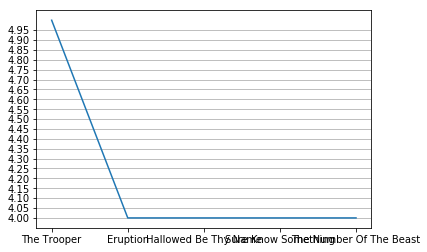

In [413]:
#Letra c
cur.execute('''SELECT SUM(invoice_items.quantity) as p, tracks.name FROM invoice_items 
            INNER JOIN tracks ON invoice_items.trackID = tracks.trackID GROUP BY tracks.name ORDER BY p DESC''')
lista_mus = list(cur.fetchall())
for k in range(0,len(lista_mus)-5):
    lista_mus.pop()
my_xticks=[]
y=[]
for r in lista_mus:
    a,b=r
    y.append(a)
    my_xticks.append(b)
x=np.arange(0,len(lista_mus))
y=np.array(y)
plt.xticks(x, my_xticks)
plt.yticks(np.arange(y.min(), y.max(), 0.05))
plt.plot(x, y)
plt.grid(axis='y', linestyle='-')
plt.show()

In [448]:
#Letra d
q='''
select *,abs(p-avg(p)) as k from (select invoices.customerID,avg(invoice_items.UnitPrice * invoice_items.Quantity) as p from invoices
inner join customers on customers.CustomerId = invoices.customerID 
inner join invoice_items on invoices.InvoiceId = invoice_items.InvoiceId
group by invoices.customerID) order by k desc
'''
cur.execute(q)
for r in cur.fetchall():
    print(r)

(59, 1.0177777777777774, 0.021756368321935282)


In [467]:
#Letra e
q='''
select tracks.Composer, albums.Title from albums
join tracks on tracks.AlbumId=albums.AlbumId
group by albums.Title
'''
cur.execute(q)
dicionario={}
for r in cur.fetchall():
    a,b=r
    if a in dicionario:
        dicionario[a].append(b)
    else:
        dicionario[a]=[b]
print(dicionario['Green Day'])

['American Idiot']
